
# **Part 1: Data Loading and Preprocessing**

In [ ]:
#1. Load the Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('/content/onlinefoods.csv')
print(df.head())

#2. Handle Missing Values
print("\nMissing Values")
print(df.isnull().sum())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [ ]:
#3. Encode Categorical Variables
df_dummies = pd.get_dummies(df, columns=['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications'], drop_first=True)
print(df_dummies)

     Age  Monthly Income  Family size  latitude  longitude  Pin code Output  \
0     20       No Income            4   12.9766    77.5993    560001    Yes   
1     24  Below Rs.10000            3   12.9770    77.5773    560009    Yes   
2     22  Below Rs.10000            3   12.9551    77.6593    560017    Yes   
3     22       No Income            6   12.9473    77.5616    560019    Yes   
4     22  Below Rs.10000            4   12.9850    77.5533    560010    Yes   
..   ...             ...          ...       ...        ...       ...    ...   
383   23       No Income            2   12.9766    77.5993    560001    Yes   
384   23       No Income            4   12.9854    77.7081    560048    Yes   
385   22       No Income            5   12.9850    77.5533    560010    Yes   
386   23  Below Rs.10000            2   12.9770    77.5773    560009    Yes   
387   23       No Income            5   12.8988    77.5764    560078    Yes   

      Feedback Unnamed: 12  Gender_Male  Marital St

In [ ]:
#4. Feature Selection
print(df.columns)

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')


In [ ]:
data_dummies = pd.get_dummies(df, drop_first=True)
data_dummies['number_size'] = (df['Family size']>1).astype(int)

In [ ]:
x = data_dummies.drop(['Age', 'Family size', 'latitude', 'longitude', 'Pin code'],axis=1)
y = data_dummies['number_size']


# **Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
#1. Descriptive Statistics
print("Descriptive Statistics of Numeric Columns:")
print(df.describe())

Descriptive Statistics of Numeric Columns:
              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


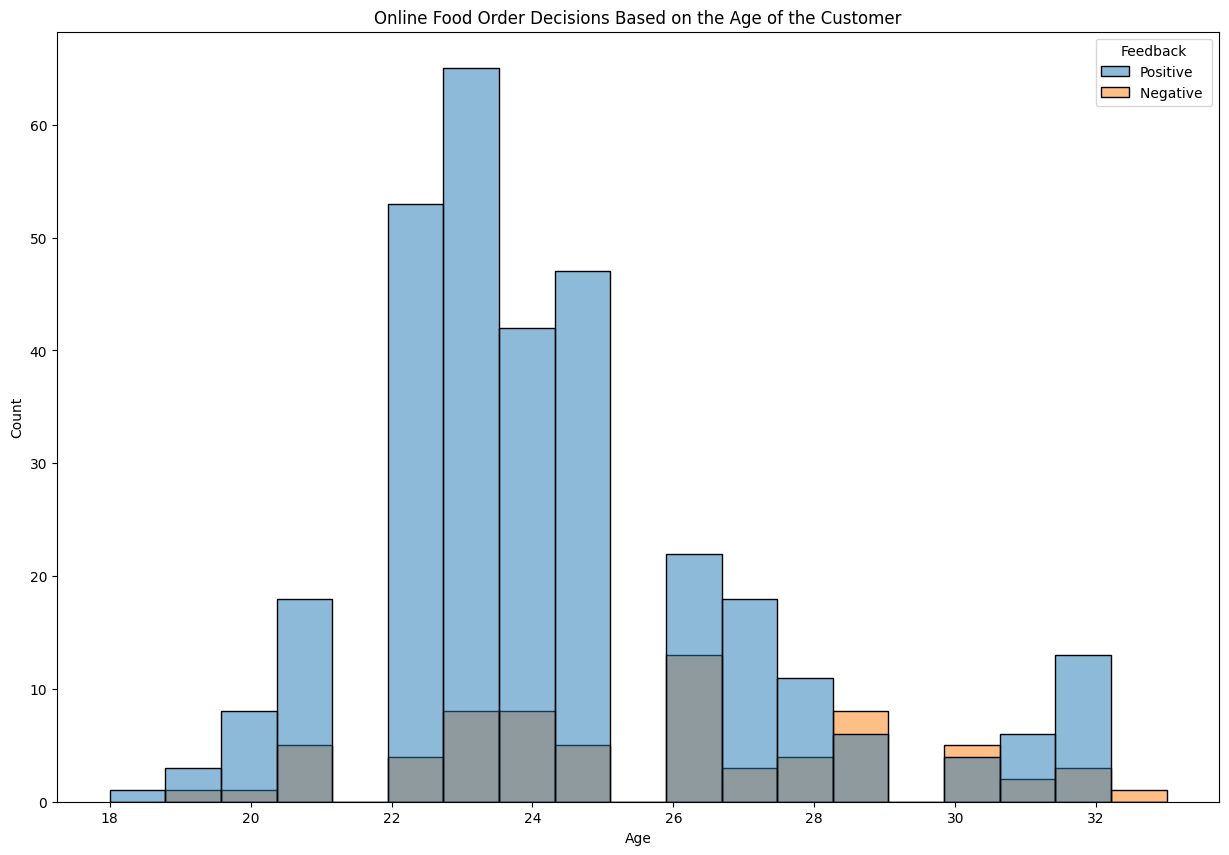

In [ ]:
#2. Visualiztions
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Feedback", data=df)
plt.show()

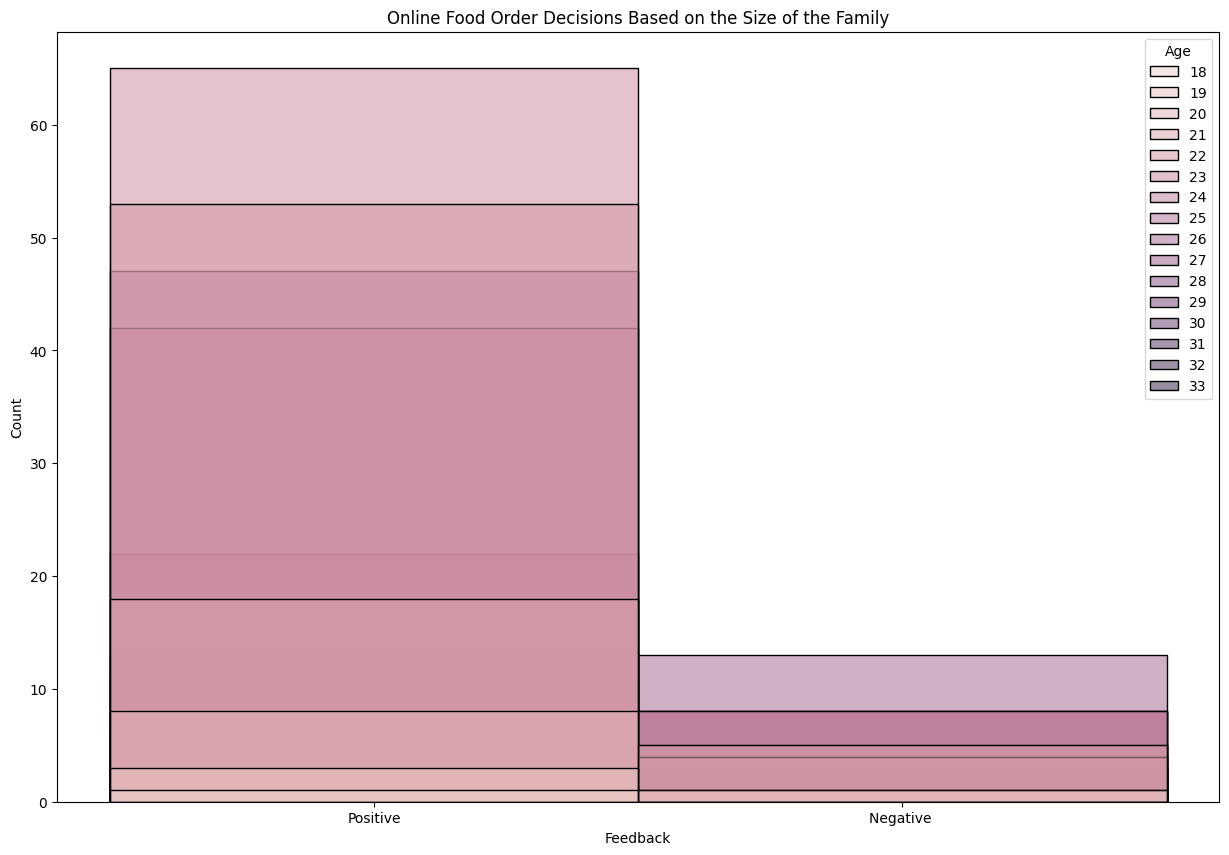

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x="Feedback", hue="Age", data=df)
plt.show()

<ipython-input-183-aba34ce34df5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


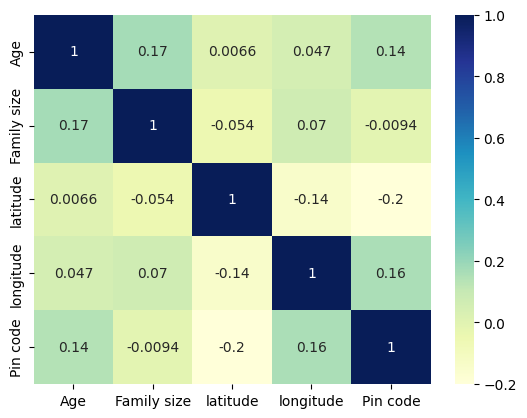

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# **Part 3: Logistic Regression Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [ ]:
# 1. Build the Mode
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#2. Model Evaluation
print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report")
print(class_report)

Accuracy: 1.0
Confusion Matrix: 
[[ 2  0]
 [ 0 76]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        76

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



**Discussion:**
The model did pretty well with high accuracy of 1.0(100%),a confusion matrix indicating perfect classification, and a classification report showing precision, recall, and F1-score of 1.00 for both classes, it appears that the model performs flawlessly on this dataset.


#**Part 4: Data Analysis and Visualization**

In [ ]:
#1. Feature Importance
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_[0]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

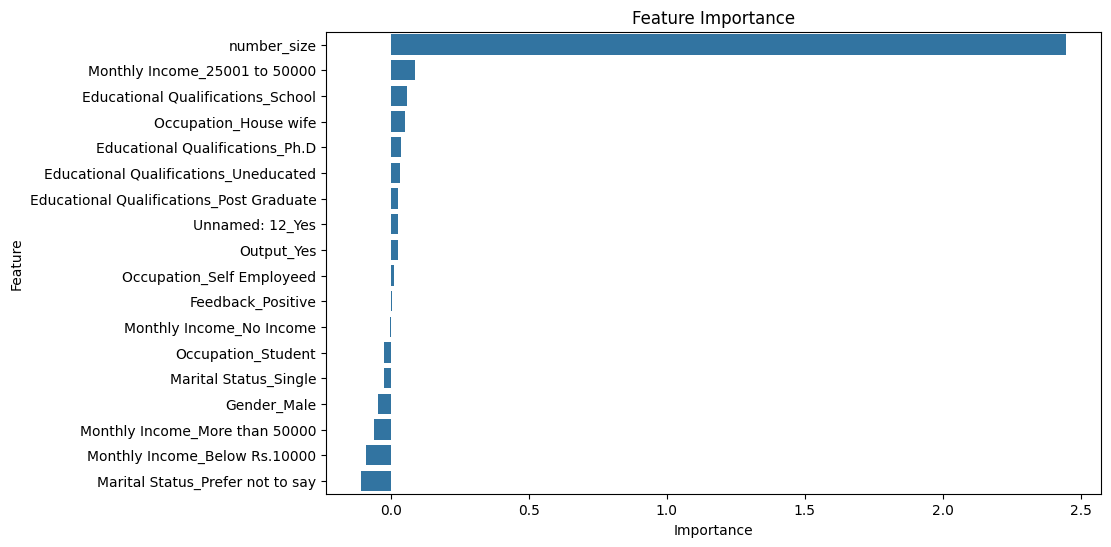

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

 **Feature Importance:** The feature importance analysis of the logistic regression model shows how each feature changes the prediction of number_size. Features with positive coefficients increase the chance of predicting a larger family size, while features with negative coefficients decrease this chance. The size of the coefficients shows how strongly each feature affects the prediction, giving useful information about what affects the prediction of family size.

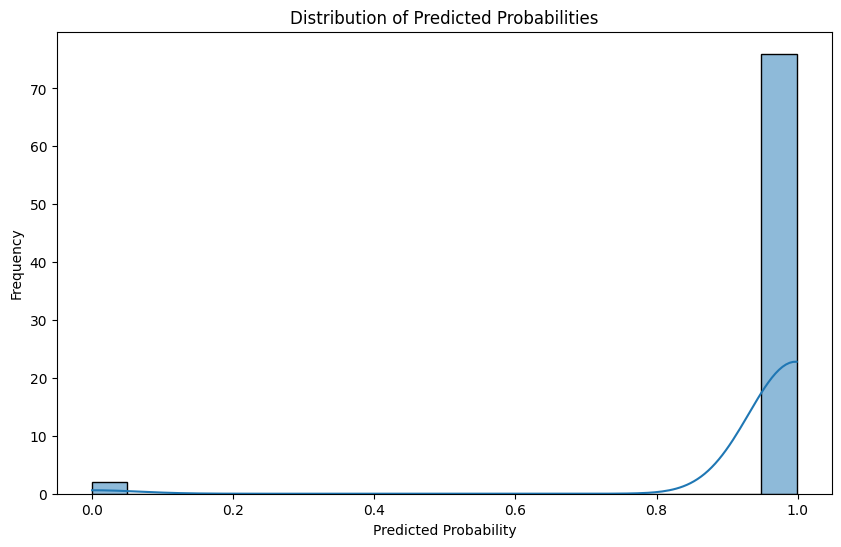

In [ ]:
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# 2.  Prediction Insights
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

**Discussing any patterns or insights:**
Looking at how predicted probabilities are spread out can tell us how sure or unsure the model is about its guesses. If there are peaks at very high or low probabilities, the model is quite sure. But if these probabilities are scattered wider, the model is less sure. Knowing these patterns helps us make decisions about how well the model is doing, what cut-off point we should use, and if we need to fine-tune the model.
